In [10]:
import os
import shutil
import random

# 현재 작업 디렉토리 가져오기
current_directory = os.getcwd()

# project_test 폴더 경로 설정
project_test_dir = os.path.join(current_directory, 'project_test')

# Mosquiot_data(5 species) 폴더 경로 설정 (절대 경로)
source_dir = r"C:\MosquitoTest\project_test\Mosquito_Data"

# Path to the main dataset directory
output_dir = r"C:\Users\it\Downloads\sorted_dataset"

# Folder names
categories = ["Aedes_aegypti", "Anopheles_gambiae", "Culex_pipiens", "Haemagogus_janthinomys", "Sabethes_cyaneus"]
train_ratio = 0.8  # 80% for training, 20% for validation

# Create output folders
train_dir = os.path.join(output_dir, "train")
validation_dir = os.path.join(output_dir, "validation")

os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

# Function to create subfolders
def create_subfolders(base_dir, categories):
    for category in categories:
        os.makedirs(os.path.join(base_dir, category), exist_ok=True)

# Create subfolders for each category
create_subfolders(train_dir, categories)
create_subfolders(validation_dir, categories)

# Sort files into train and validation folders
for category in categories:
    category_dir = os.path.join(source_dir, category)
    if not os.path.exists(category_dir):
        print(f"Category folder not found: {category_dir}")
        continue

    files = os.listdir(category_dir)
    random.shuffle(files)  # Shuffle for random distribution

    # Split files into training and validation sets
    split_index = int(len(files) * train_ratio)
    train_files = files[:split_index]
    validation_files = files[split_index:]

    # Move files to train folder
    for file in train_files:
        src_path = os.path.join(category_dir, file)
        dest_path = os.path.join(train_dir, category, file)
        shutil.copy2(src_path, dest_path)

    # Move files to validation folder
    for file in validation_files:
        src_path = os.path.join(category_dir, file)
        dest_path = os.path.join(validation_dir, category, file)
        shutil.copy2(src_path, dest_path)

    print(f"Category '{category}' sorted: {len(train_files)} train files, {len(validation_files)} validation files")

print("Dataset sorting completed!")

Category 'Aedes_aegypti' sorted: 292 train files, 74 validation files
Category 'Anopheles_gambiae' sorted: 33 train files, 9 validation files
Category 'Culex_pipiens' sorted: 80 train files, 20 validation files
Category 'Haemagogus_janthinomys' sorted: 26 train files, 7 validation files
Category 'Sabethes_cyaneus' sorted: 68 train files, 17 validation files
Dataset sorting completed!


Category 'Aedes_aegypti' sorted: 292 train files, 74 validation files
Category 'Anopheles_gambiae' sorted: 33 train files, 9 validation files
Category 'Culex_pipiens' sorted: 80 train files, 20 validation files
Category 'Haemagogus_janthinomys' sorted: 26 train files, 7 validation files
Category 'Sabethes_cyaneus' sorted: 68 train files, 17 validation files
Dataset sorting completed!
Found 622 images belonging to 15 classes.
Found 308 images belonging to 15 classes.
Number of training samples: 622
Number of validation samples: 308
Number of classes: 15
Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 847ms/step - accuracy: 0.4789 - loss: 1.8042 - val_accuracy: 0.5877 - val_loss: 1.2618
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 736ms/step - accuracy: 0.5685 - loss: 1.3129 - val_accuracy: 0.5909 - val_loss: 1.1923
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 710ms/step - accuracy: 0.5876 - loss: 1.1515 - val_accuracy: 0.6234 - val_loss: 0.9448
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 712ms/step -

Model saved to mosquito_species_model.h5


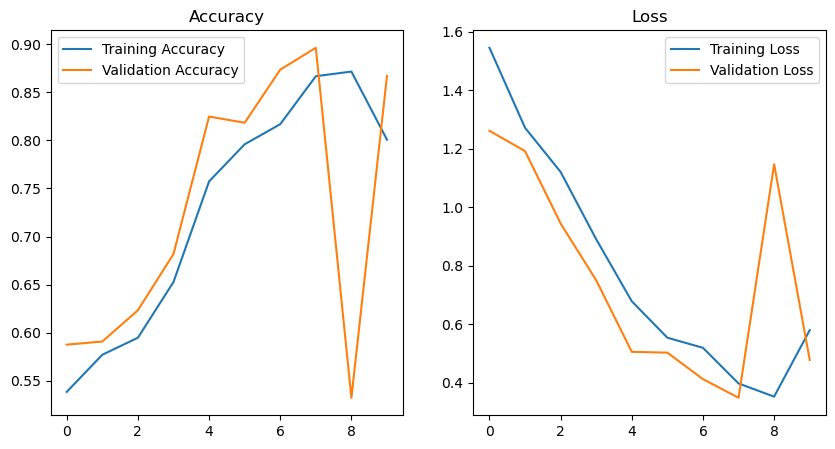

Test image not found. Please check the file path.


In [12]:
import os
import shutil
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# 현재 작업 디렉토리 가져오기
current_directory = os.getcwd()

# project_test 폴더 경로 설정
project_test_dir = os.path.join(current_directory, 'project_test')

# Mosquiot_data(5 species) 폴더 경로 설정 (절대 경로)
source_dir = r"C:\MosquitoTest\project_test\Mosquito_Data"

# Path to the main dataset directory
output_dir = r"C:\Users\it\Downloads\sorted_dataset"

# Folder names
categories = ["Aedes_aegypti", "Anopheles_gambiae", "Culex_pipiens", "Haemagogus_janthinomys", "Sabethes_cyaneus"]
train_ratio = 0.8  # 80% for training, 20% for validation

# Create output folders
train_dir = os.path.join(output_dir, "train")
validation_dir = os.path.join(output_dir, "validation")

os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

# Function to create subfolders
def create_subfolders(base_dir, categories):
    for category in categories:
        os.makedirs(os.path.join(base_dir, category), exist_ok=True)

# Create subfolders for each category
create_subfolders(train_dir, categories)
create_subfolders(validation_dir, categories)

# Sort files into train and validation folders
for category in categories:
    category_dir = os.path.join(source_dir, category)
    if not os.path.exists(category_dir):
        print(f"Category folder not found: {category_dir}")
        continue

    files = os.listdir(category_dir)
    random.shuffle(files)  # Shuffle for random distribution

    # Split files into training and validation sets
    split_index = int(len(files) * train_ratio)
    train_files = files[:split_index]
    validation_files = files[split_index:]

    # Move files to train folder
    for file in train_files:
        src_path = os.path.join(category_dir, file)
        dest_path = os.path.join(train_dir, category, file)
        shutil.copy2(src_path, dest_path)

    # Move files to validation folder
    for file in validation_files:
        src_path = os.path.join(category_dir, file)
        dest_path = os.path.join(validation_dir, category, file)
        shutil.copy2(src_path, dest_path)

    print(f"Category '{category}' sorted: {len(train_files)} train files, {len(validation_files)} validation files")

print("Dataset sorting completed!")

# Paths to the dataset
base_dir = output_dir
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")

# Image parameters
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

# Create Image Data Generators
train_datagen = ImageDataGenerator(rescale=1.0/255)
validation_datagen = ImageDataGenerator(rescale=1.0/255)

# 훈련 데이터 로드
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# 검증 데이터 로드
validation_data = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# 데이터셋이 올바르게 로드되었는지 확인
print(f"Number of training samples: {train_data.samples}")
print(f"Number of validation samples: {validation_data.samples}")

# 클래스 수 확인
num_classes = len(train_data.class_indices)
print(f"Number of classes: {num_classes}")

# Build the CNN Model
def build_model(num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the model
model = build_model(num_classes)

# 데이터셋이 비어있지 않은지 확인
if train_data.samples == 0 or validation_data.samples == 0:
    raise ValueError("Training or validation data is empty. Please check the dataset paths and contents.")

history = model.fit(
    train_data,
    epochs=10,
    validation_data=validation_data
)

# Save the model
model_path = "mosquito_species_model.h5"
model.save(model_path)
print(f"Model saved to {model_path}")

# Plot Training and Validation Accuracy/Loss
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Loss')

    plt.show()

plot_history(history)

# Predict Function
def predict_image(image_path, model):
    img = Image.open(image_path).resize((IMG_WIDTH, IMG_HEIGHT))
    img_array = np.array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    predictions = model.predict(img_array)
    class_indices = train_data.class_indices
    class_names = list(class_indices.keys())
    
    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions) * 100

    print(f"Predicted Species: {predicted_class} ({confidence:.2f}%)")

# Test the Model with a New Image
# 현재 작업 디렉토리 가져오기
current_directory = os.getcwd()

# project_test 폴더 경로 설정
project_test_dir = os.path.join(current_directory, 'project_test')

# test_image/test 폴더 경로 설정
test_image_dir = os.path.join(project_test_dir, 'test_image', 'test')

# 테스트 이미지 파일 경로 설정 
test_image_path = os.path.join(test_image_dir, 'example_test_image.jpg')

if os.path.exists(test_image_path):
    loaded_model = load_model(model_path)
    predict_image(test_image_path, loaded_model)
else:
    print("Test image not found. Please check the file path.")